# Librerías

In [34]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar

plt.rcParams["figure.figsize"] = (12,7) #tamaño de los gráficos: ancho x alto

from scipy.integrate import solve_ivp
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

---
# Un ejemplo sencillo del modelo predador-presa.

### $x_1(t)$ es la población de predadores a tiempo $t$.
### $x_2(t)$ es la población de presas a tiempo $t$.

$$
\begin{cases}
x_1'(t)&= -0.5x_1(t)+0.02x_1(t)x_2(t)\\
x_2'(t) &= x_2(t)-0.02x_1(t)x_2(t)\\
x_1(0)&=4 \\
x_2(0) &= 20
\end{cases}
$$

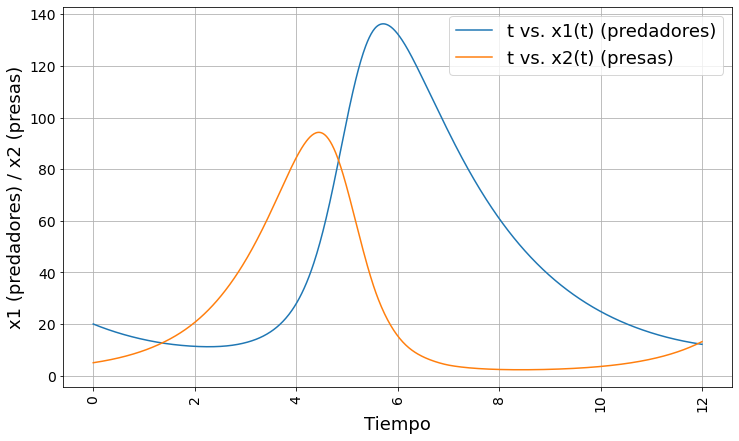

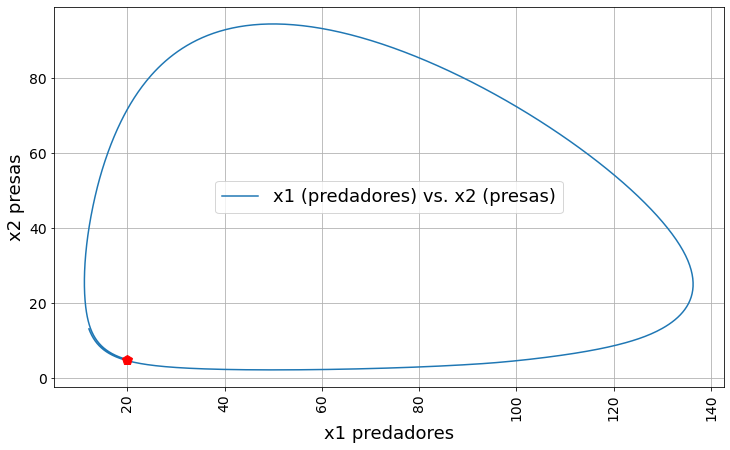

In [35]:
# experimentar cambiando parámetros!
def func(t,z): #ojo z es un vector: así lo necesita solve_ivp
    x1 = z[0]
    x2 = z[1]
    f1 = -0.5*x1 + 0.02*x1*x2
    f2 = x2 - 0.02*x1*x2
    f = [f1,f2] #así lo necesita solve_ivp
    return f


# intervalo de tiempo: experimentar cambiando!
t0 = 0
tf = 12 # cambiar para ver evolución

# condiciones iniciales: experimentar cambiando!
x1_0 = 20
x2_0 = 5
z0 = [x1_0, x2_0] #así lo necesita solve_ivp

# resuelvo el sistema por solve_ivp
solucion = solve_ivp(func, [t0, tf], z0, dense_output=True)

vals_t = np.linspace(t0,tf,1000)  # para que evalúe la solución en muchos puntos
vals_sol = solucion.sol(vals_t)


# estética para letra más grande
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)


# grafico t vs. x(t)
plt.plot(vals_t, vals_sol[0], label="t vs. x1(t) (predadores)") #el [0] es para que devuelva solamente valores de x1

# grafico t vs. y(t)
plt.plot(vals_t, vals_sol[1], label="t vs. x2(t) (presas)") #el [1] es para que devuelva solamente valores de x2
plt.xlabel("Tiempo", fontsize=18)
plt.ylabel("x1 (predadores) / x2 (presas)", fontsize=18)
plt.legend(fontsize=18)
plt.grid() #marcas horizontales y verticales de refencia
plt.show() #muestra los gráficos hasta el momento


# estética para letra más grande
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# grafico retrato fase (o diagrama de fases): x vs y
plt.plot(vals_sol[0], vals_sol[1], label="x1 (predadores) vs. x2 (presas)")
plt.xlabel("x1 predadores", fontsize=18)
plt.ylabel("x2 presas", fontsize=18)
plt.legend(fontsize=18)
plt.grid() #marcas horizontales y verticales de refencia
plt.plot(x1_0, x2_0, 'rp', markersize=10) #punto condición inicial

## Ayudándose de ambos gráficos, ¿en cuál sentido se recorre el gráfico de predadores vs. presas?